In [17]:
#importing required libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression


In [18]:
#read the dataset file

delivery = pd.read_csv("datasets\delivery.csv")
delivery

,n.prod,distance,delTime
0,7,560,16.68
1,3,220,11.50
2,3,340,12.03
3,4,80,14.88
4,6,150,13.75
5,7,330,18.11
6,2,110,8.00
7,7,210,17.83
8,30,1460,79.24
9,5,605,21.50


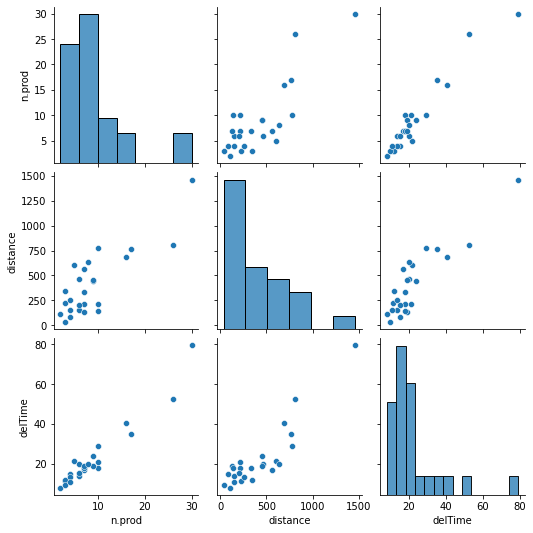

In [19]:
sns.pairplot(delivery)

In [20]:
model = LinearRegression()
X= delivery[["n.prod","distance"]]
y=delivery['delTime']

model.fit(X,y)

print("Intercept:",model.intercept_ ,"\nCoefficients:",model.coef_)

Intercept: 2.3412311451922037 
Coefficients: [1.61590721 0.01438483]


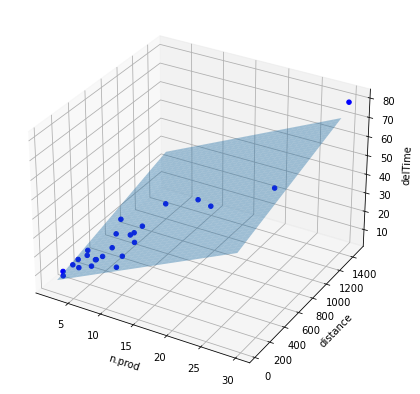

In [26]:
#Setting up the plot area
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111,projection='3d')#projection = '3d' is used to have 3D axes

#3d scatterplot of the delivery dataset
ax.scatter(xs = delivery["n.prod"], ys = delivery["distance"], zs=delivery["delTime"],
           c='blue',
           alpha=1,
           marker='o')
ax.set_xlabel("n.prod")
ax.set_ylabel("distance")
ax.set_zlabel("delTime")

#Creating a mesh of x and y values to plot the regression plane
x_surf = np.arange(delivery["n.prod"].min(), delivery["n.prod"].max(), 1) 
y_surf = np.arange(delivery["distance"].min(), delivery["distance"].max(), 1)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
X_mesh = pd.core.frame.DataFrame({'n.prod': x_surf.ravel(), 'distance': y_surf.ravel()})

#Predicting the output of model for every point in the mesh
out = model.predict(X_mesh)

#Plotting the regression plane
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                alpha = 0.4) # apha => transparency of the surface

In [ ]:
model.predict()